<a href="https://colab.research.google.com/github/dhyannn/Computer-vision/blob/main/dhyan_cv_lad6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
# Load an image
image = cv2.imread('/content/cat.jpg', cv2.IMREAD_GRAYSCALE)

In [13]:
# Function to apply median filter
def median_filter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

# Function to apply max filter
def max_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.dilate(image, kernel)

# Function to apply min filter
def min_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.erode(image, kernel)

# Function to apply mid-point filter
def mid_point_filter(image, kernel_size):
    max_filtered = max_filter(image, kernel_size)
    min_filtered = min_filter(image, kernel_size)
    return (max_filtered + min_filtered) / 2

# Function to apply alpha-trimmed filter
def alpha_trimmed_filter(image, kernel_size, alpha):
    pad_width = kernel_size // 2
    padded_image = np.pad(image, pad_width, mode='constant')
    filtered_image = np.zeros_like(image)

    for i in range(pad_width, padded_image.shape[0] - pad_width):
        for j in range(pad_width, padded_image.shape[1] - pad_width):
            neighborhood = padded_image[i-pad_width:i+pad_width+1, j-pad_width:j+pad_width+1]
            trimmed_neighborhood = np.sort(neighborhood.flatten())[alpha:-alpha]
            filtered_image[i-pad_width, j-pad_width] = np.mean(trimmed_neighborhood)

    return filtered_image.astype(np.uint8)

In [14]:
# Apply median filter
median_filtered = median_filter(image, 5)

# Apply max filter
max_filtered = max_filter(image, 3)

# Apply min filter
min_filtered = min_filter(image, 3)

# Apply mid-point filter
mid_point_filtered = mid_point_filter(image, 3)

# Apply alpha-trimmed filter
alpha_trimmed_filtered = alpha_trimmed_filter(image, 3, 1)

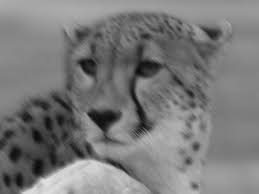

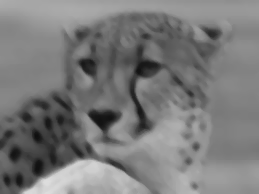

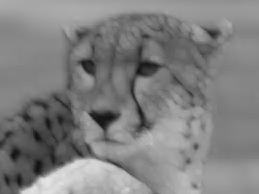

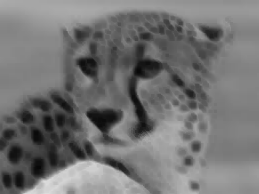

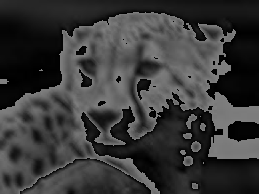

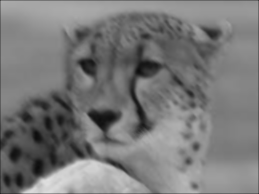

In [15]:
# Display the filtered images
cv2_imshow(image)
cv2_imshow(median_filtered)
cv2_imshow(max_filtered)
cv2_imshow(min_filtered)
cv2_imshow(mid_point_filtered)
cv2_imshow(alpha_trimmed_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()